# Training RL Cliff Walking Agent Through Q-Learning

CMSC389F Final Project Spring 2022

By: Andrew Yuan, Vibhu Agrawal

In [20]:
import gym 
import numpy as np

env = gym.make('CliffWalking-v0')

## Description

The board is a 4x12 matrix, with (using NumPy matrix indexing):

* [3, 0] as the start at bottom-left

* [3, 11] as the goal at bottom-right

* [3, 1..10] as the cliff at bottom-center

If the agent steps on the cliff it returns to the start. An episode terminates when the agent reaches the goal.

In [21]:
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



## Actions

There are 4 discrete deterministic actions:

0: move up

1: move right

2: move down

3: move left

In [23]:
env.action_space

Discrete(4)

## Observations

There are 3x12 + 1 possible states. In fact, the agent cannot be at the cliff, nor at the goal (as this results the end of episode). They remain all the positions of the first 3 rows plus the bottom-left cell.

In [24]:
env.observation_space

Discrete(48)

## Reward

Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.

## Q-Learning Algorithm Implementation

Alpha is the learning rate (between 0 and 1) and we have set alpha to 0.5. Gamma is the weighting between future reward versus immediate reward, and we have set gamma to 0.9. 

We set the starting_state to 36 since according to our environment, we should start at the bottom left corner of our 4 * 12 grid, and the flat index of that position would be 36. 

The rest of the Q-Learning algorithm follows the pseudocode outlined in Slide 13 of the Week 13 Lecture.

In [44]:
# Initialize Q-Table
q_table = np.zeros(([env.observation_space.n, env.action_space.n]))

# Initialize alpha and gamma values
alpha = 0.5
gamma = 0.9

# Initialize empty array to keep track of rewards over each iteration so that we can plot later
all_rewards = []

# Iterate 100 times
for i in range(100):

    # Start at bottom left corner
    current_state = 36

    env.reset()
    total_reward = 0

    while True:

        # Choose the max action value for our current_state from our Q-Table
        max_action = np.argmax(q_table[current_state, :])

        # Take that action and get the reward
        obs, reward, done, info = env.step(max_action)

        # Update total reward
        total_reward += reward

        # Get the max action value for the state you'd be on once you take max_action
        action_prime = np.argmax(q_table[obs, :])

        # Use formula talked about in class to update q_table
        q_table[current_state, max_action] += alpha*(reward + gamma*(q_table[obs, action_prime] - q_table[current_state, max_action]))
        
        # Update current_state
        current_state = obs

        if done:
            break
        
    all_rewards.append(total_reward)

## Plotting Q-Table

We use matplotlib in order to plot our Q-Table. We plot the reward over the number of iterations we trained the agnet, and from our table, we see that the agent has learned to incur almost no loss in reward (close to 0) after 20 or so iterations. 

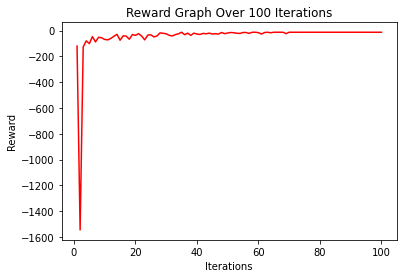

In [45]:
import matplotlib.pyplot as plt
x = np.arange(1, 101)
y = np.array(all_rewards)

plt.title("Reward Graph Over 100 Iterations")
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.plot(x, y, color ="red")
plt.show()